In [3]:
df = pd.read_csv('Iris.csv')
def clearscreen(numlines=100):
    """Clear the console.
    numlines is an optional argument used only as a fall-back.
    """
    import os
    if os.name == "posix":
        # Unix/Linux/MacOS/BSD/etc
        os.system('clear')
    elif os.name in ("nt", "dos", "ce"):
        # DOS/Windows
        os.system('CLS')
    else:
        # Fallback for other operating systems.
        pass

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random 
from pprint import pprint

pipeline!!!

In [4]:
# preparing data
df = pd.read_csv('Iris.csv')

In [5]:
df.head(4)

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [6]:
df=df.drop('Id', axis=1) 

In [7]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [8]:
"""Formating data:
1. таргетную переменную обзовем 'label'
2. устранить нулевые данные
"""
clearscreen()

In [9]:
df=df.rename(columns={"species": 'label' })
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [10]:
df.info() # нет нулей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:

def train_test_split(df, test_size):
    
    if isinstance(test_size, float): 
        test_size = round(test_size * len(df))

    indices = df.index.tolist() 
    test_indices = random.sample(population=indices, k=test_size) 

    test_df = df.loc[test_indices] 
    train_df = df.drop(test_indices) 
    
    return train_df, test_df 

In [12]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=20)

In [13]:
data = train_df.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [14]:
def check_purity(data):
    label_column = data[:,-1] # вытащили массив таргетов
    unique_classes = np.unique(label_column) 

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [15]:
check_purity(train_df[train_df.petal_width < 1.2].values)

False

In [16]:
# classify - вытаскиваем просто тот класс, который в данной пригоршне - самый частый
def classify_data(data):
    label_column = data[:,-1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True) # возвращает уникальные и как часто они встречаются (tuple), складывает в два массива

    index = counts_unique_classes.argmax()  
    classification = unique_classes[index] # appears most often
    
    return classification # string with target label

In [17]:
classify_data(train_df[(train_df.petal_width > 0.8) & (train_df.petal_width < 2)].values)

'Iris-versicolor'

In [18]:
def get_potential_splits(data): # возвращаем словарь. ключи - индексы фичей, объект - массив потенциальных сплитов
    potential_splits = {}
    n_columns = data.shape[-1]

    for column_index in range(n_columns - 1): 
        potential_splits[column_index]  = [] # закидываем в словарь ключ текущей фичи
        values = data[:,column_index] # вытаскиваем данные по  текущей фиче 
        unique_values = np.unique(values) 
        
        for index in range(len(unique_values)): 
            if index != 0: 
                current_value = unique_values[index] 
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value)/2 

                potential_splits[column_index].append(potential_split)
          
    return potential_splits # ====> {0: [2.3, 4.999, 9.1], 1: [...], ...}

In [19]:
potential_splits = get_potential_splits(train_df.values)

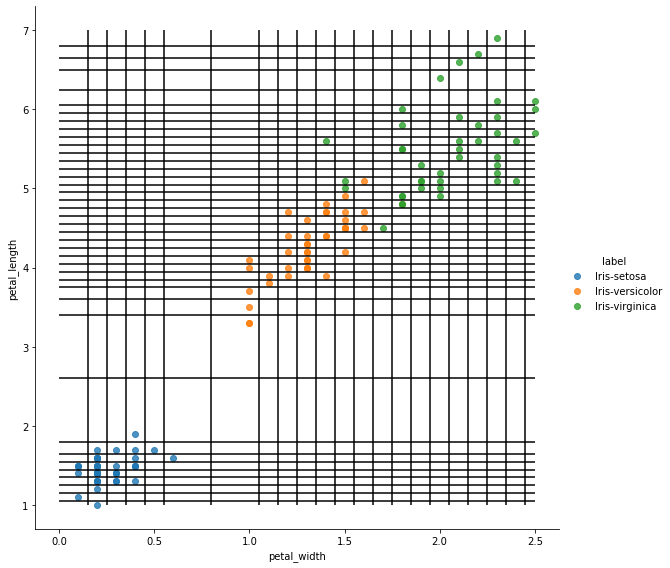

In [20]:
sns.lmplot(data=train_df, x='petal_width', y='petal_length',hue="label", fit_reg=False, height=8)

plt.vlines(x=potential_splits[3], ymin=1, ymax=7) # нарисовать потенциальные сплиты 
plt.hlines(y=potential_splits[2], xmin=0, xmax=2.5)

In [21]:
#splitting - принимает фичу для сплита, и значение фичи для сплита
def split_data(data, split_column, split_value):
    split_column_values = data[:,split_column] 
 
    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]

    return data_below, data_above 

In [22]:
split_column = 3
split_value =0.8
data_below, data_above = split_data(data, split_column, split_value)

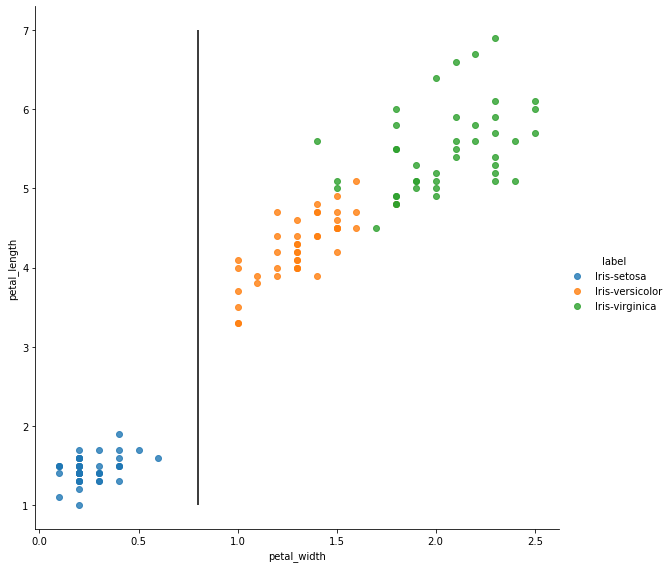

In [23]:
plotting_df=pd.DataFrame(data, columns=df.columns)
sns.lmplot(data=plotting_df, x='petal_width', y= 'petal_length', hue="label", fit_reg=False, height=8)
plt.vlines(x=split_value, ymin=1, ymax=7)

$\text{Entropy} = \sum\limits_{i=1}^{c} p_i \cdot (- \log_2 p_i)$

$$\text{Overall_Entropy} = \sum\limits_{i=1}^{2} p_i \cdot \text{Entropy}$$

<p style="align: center;"><img align=center src="https://sun9-84.userapi.com/impg/-VYBZBh8N-yHINUD5CWNI4xrBXmJnAaQbW34sA/b2eg8MdB6PM.jpg?size=747x909&quality=96&sign=d4cdcc3f8122d8b05af6310219801bd5&type=album"  width=400></p>

In [24]:
# lowest overall entropy - функция смотрит на все потенциальные
# сплиты и выбирает минимальную энтропию по всем 

In [25]:
def calculate_entropy(data): 
    label_column = data[:,-1] 
    counts = np.unique(label_column, return_counts=True)[1] 
    probabilities = counts / counts.sum() 
    entropy = sum(probabilities * -np.log2(probabilities)) 
    return entropy

In [26]:
calculate_entropy(data_above)

1.0

In [27]:
def calculate_overall_entropy(data_below, data_above): 
    n = len(data_below) +  len(data_above) 
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy = p_data_below * calculate_entropy(data_below)+ p_data_above * calculate_entropy(data_above)
    return overall_entropy

In [28]:
calculate_overall_entropy(data_below, data_above)

0.6461538461538462

In [29]:
def determine_best_split(data, potential_splits):

    overall_entropy = 999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    return best_split_column, best_split_value

In [30]:
determine_best_split(data, potential_splits)

(3, 0.8)

<p style="align: center;"><img align=center src="https://sun9-34.userapi.com/impg/t3xBm-zzP1MMs_RXHt7lzgd59_e6c8rPIl6nQg/wNEhhKVmpmc.jpg?size=592x465&quality=96&sign=4942be1ad97dce476137ac8003eaed5a&type=album"  width=400></p>

In [31]:
# пример дерева
sub_tree = {question : [yes_answer, no_answer]}

NameError: name 'question' is not defined

In [32]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns 
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        #если дошли до макс. глубины, или сэмплов 1
        classification = classify_data(data) # возвращает самое часто встреч.
        return classification

    
    # recursive part
    else:    
        counter += 1 

        # получаем лучшие сплиты 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        # лучшая фича для сплита 
        question = "{} <= {}".format(feature_name, split_value) 
        
        sub_tree = {question: []} # словарь
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth) # рекурсивный вызов для левого листа
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth) # правый
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree


In [33]:
tree = decision_tree_algorithm(train_df, max_depth=3)
pprint(tree)

{'petal_width <= 0.8': ['Iris-setosa',
                        {'petal_width <= 1.65': [{'petal_length <= 4.95': ['Iris-versicolor',
                                                                           'Iris-virginica']},
                                                 'Iris-virginica']}]}


In [34]:
# classification
example = test_df.iloc[0]
# функция классификации одного объекта
def classify_example(example, tree):
    question = list(tree.keys())[0] 
    feature_name, comparison_operator, value =  question.split() # string    'petal <= 0' ==> ['petal', '<=', '0']

    if example[feature_name] <= float(value):
        # ответ правильный - возвращаем класс
        answer = tree[question][0]
    else:
        # нет - словарь дальше
        answer = tree[question][1]

    if not isinstance(answer, dict):
        return answer

    else:
        residual_tree = answer
        return classify_example(example, residual_tree)
    
    

In [35]:
example = test_df.iloc[3]
print(example)
classify_example(example, tree)

sepal_length                5.6
sepal_width                   3
petal_length                4.5
petal_width                 1.5
label           Iris-versicolor
Name: 66, dtype: object


'Iris-versicolor'

In [36]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [37]:
calculate_accuracy(test_df, tree)

0.95

In [38]:
test_df[test_df.classification_correct == False] # неправильные

,sepal_length,sepal_width,petal_length,petal_width,label,classification,classification_correct
77,6.7,3.0,5.0,1.7,Iris-versicolor,Iris-virginica,False


In [45]:
# проведем некоторые изменения в функциях, для обобщения на категориальные

# titanic dataset

In [46]:
df = pd.read_csv('Titanic.csv')

In [47]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [48]:
df['label'] = df.Survived
df = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1


In [49]:
df.info() #видим missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   label     891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [50]:
median_age = df.Age.median()   # медиану в возарсте
mode_embarked = df.Embarked.mode()[0] # моду в Embarked  

df = df.fillna({'Age': median_age, 'Embarked': mode_embarked})

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   label     891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [52]:
# decision tree algorithm
#train_df, test_df = train_test_split(df, test_size=0.3) # делим
#tree = decision_tree_algorithm(train_df) # обучение
#accuracy = calculate_accuracy(test_df, tree) # тест
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [53]:
# категориальные -те, где string или номер уникальных значений < трэшхолда
def determine_type_of_feature(df):
    feature_types = []
    n_unique_values_treshold = 15 # трэшхолд
    
    for column in df.columns:
        unique_values = df[column].unique()
        example_value = unique_values[0]
        
        if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
            feature_types.append('categorical')
            
        else:
            feature_types.append('continuous')            
            
    return feature_types

In [54]:
for column in df.columns:
    print(column, '-', len(df[column].unique()))

Pclass - 3
Sex - 2
Age - 88
SibSp - 7
Parch - 7
Fare - 248
Embarked - 3
label - 2


In [55]:
feature_types = determine_type_of_feature(df)
i = 0
for column in df.columns:
    print(column, '-', feature_types[i])
    i+=1

Pclass - categorical
Sex - categorical
Age - continuous
SibSp - categorical
Parch - categorical
Fare - continuous
Embarked - categorical
label - categorical


In [56]:
column

'label'

In [57]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,28.0,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1
